In [1]:
#%matplotlib qt
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa
import sys
from scipy import interpolate
sys.path.append("..")
sys.path.append('../Viterbi')
from CurvatureTools import *
from SyntheticCurves import *
from Viterbi import getCSM

Speed = pitch ~~~ Distance = amplitude

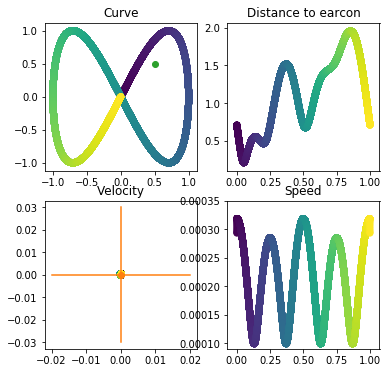

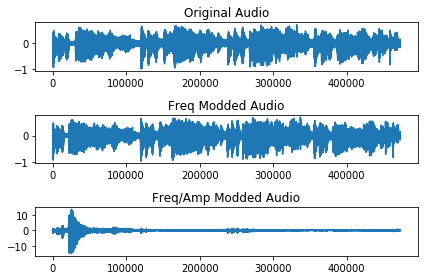

In [32]:
#load audio sample
fs = 44100
AS, sr = librosa.load("Autumn Leaves Sample.wav", sr=fs)


#creating figure 8
s = 1
tL = fs * s
t = np.linspace(0, s, tL)
X = get2DFigure8(t)

#create earcon
earcon = np.array([0.5, 0.5])

#compute distance to earcon
dists = getCSM(X, earcon[None, :]).flatten()

#compute velocity
V = getCurvVectors(X, 1, 5, loop=True)[1]

#compute Speed
VMag = np.sqrt(np.sum(V**2, axis=1))

#interpolate speed to size of audio sample
fac = len(AS)/len(VMag)
N = len(VMag)
x = np.linspace(0, 1, N)
f = interpolate.interp1d(x,VMag,kind='cubic')
xnew = np.linspace(0, 1, int(fac*N))
IS = f(xnew)

#get cumsum of speed for interpolation
ISInteg = np.cumsum(IS, axis=0)/fs
scale = ISInteg[len(ISInteg)-1]
IS = ISInteg / scale

#mod audio speed to interpolated speed
lA = len(AS)
xA = np.linspace(0, 1, lA)
fA = interpolate.interp1d(xA,AS,kind='cubic')
FMAS = fA(IS)

#interpolate distance to size of mod audio sample
dfac = len(FMAS)/len(dists)
dN = len(dists)
dx = np.linspace(0, 1, dN)
fd = interpolate.interp1d(dx,dists,kind='cubic')
dxnew = np.linspace(0, 1, int(dfac*dN))
D = fd(dxnew)

#apply amplitude modulation (I used exponential because simple multiplication didn't have a usable effect)
ampchange = 2
FAMAS = FMAS[:] / (D[:]**ampchange)


#plot figure 8
plt.figure(figsize=(6, 6))
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=t)
plt.scatter([earcon[0]], [earcon[1]], c='C2')
plt.title("Curve")

#plot distance
plt.subplot(222)
plt.scatter(t, dists, c=t)
plt.title("Distance to earcon")

#plot velocity
plt.subplot(223)
plt.scatter(V[:, 0], V[:, 1], c=t)
plt.scatter([0], [0], c='C1')
plt.plot([-0.02, 0.02], [0, 0], c='C1')
plt.plot([0, 0], [-0.03, 0.03], c='C1')
plt.title("Velocity")

#plot speed
plt.subplot(224)
plt.scatter(t, VMag, c=t)
plt.ylim(np.min(VMag)/1.1,np.max(VMag)*1.1)
plt.title("Speed")

plt.show()

#plot audio and mods
plt.figure()
plt.subplot(311)
plt.plot(AS)
plt.title("Original Audio")
plt.subplot(312)
plt.plot(FMAS)
plt.title("Freq Modded Audio")
plt.subplot(313)
plt.plot(FAMAS)
plt.title("Freq/Amp Modded Audio")
plt.tight_layout()


In [30]:
#Modulated Audio
ipd.Audio(IAS, rate=fs)

In [31]:
#Audio
ipd.Audio(AS, rate=fs)